<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/frequent_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/colab/Handling missing Categorical values/train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().sum()*100

,0
FireplaceQu,69000
GarageQual,8100
SalePrice,0


<Axes: xlabel='GarageQual'>

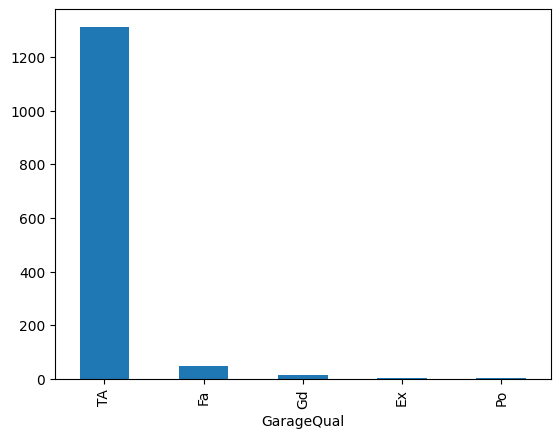

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


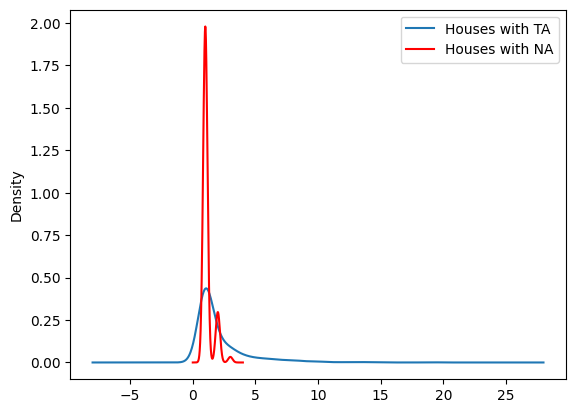

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].value_counts().plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].value_counts().plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

In [ ]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual']=df['GarageQual'].fillna('TA')


<Axes: xlabel='GarageQual'>

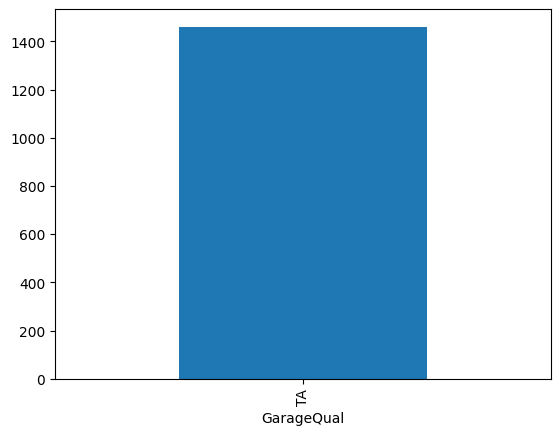

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

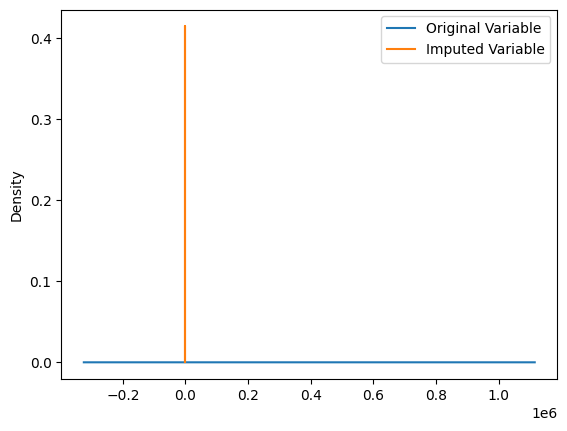

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].value_counts().plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
labels=['Original Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

<Axes: xlabel='FireplaceQu'>

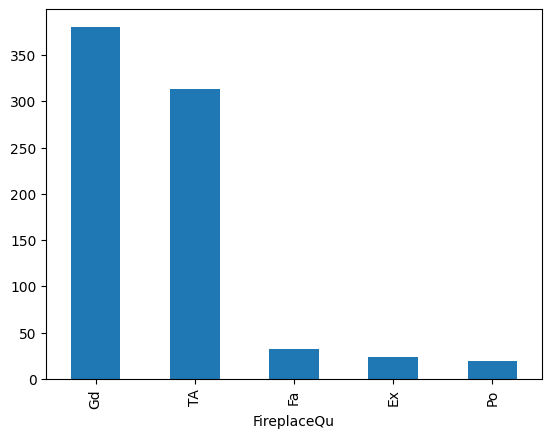

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


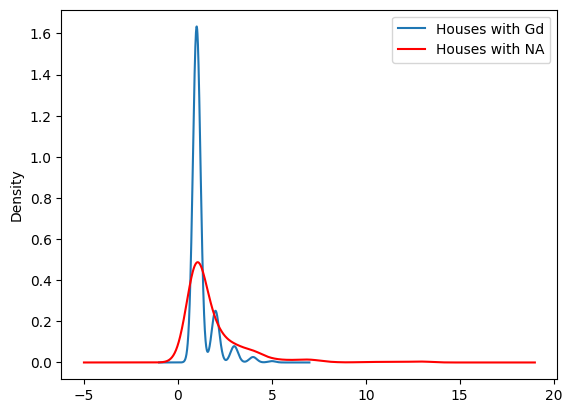

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].value_counts().plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].value_counts().plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

In [ ]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna('Gd')

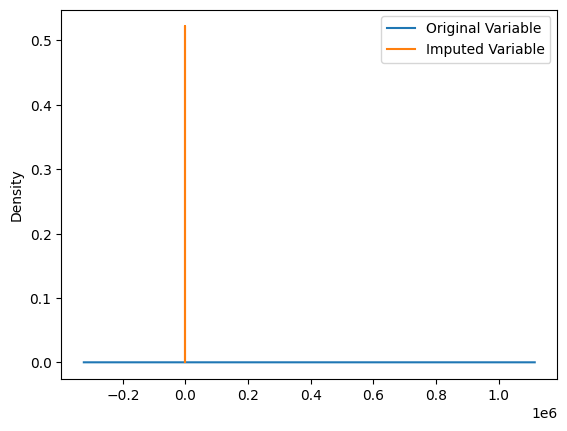

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].value_counts().plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
labels=['Original Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

Using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'],axis=1),df['SalePrice'],test_size=0.3,random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imputer=SimpleImputer(strategy='most_frequent')

In [ ]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [ ]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)